In [3]:
%cd ../../

d:\project\2025\research_agent


In [11]:
from config.config import settings

from agents.interviewer.graph import interviewer
from agents.planner.graph import planner

from IPython.display import Image, display
from langchain_core.messages import HumanMessage

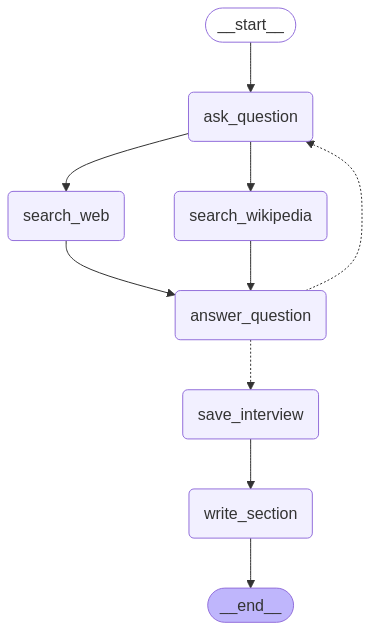

In [7]:
display(Image(interviewer.get_graph(xray=1).draw_mermaid_png()))

In [ ]:
max_analysts = 3
topic = "The benefits of adopting LangGraph as an agent framework"
thread = {"configurable": {"thread_id": "1"}}

for event in planner.stream({"topic": topic, "max_analysts": max_analysts}, config=thread, stream_mode="values"):
    analysts = event.get("analysts", None)
    if analysts:
        for analyst in analysts:
            print(f"Name: {analyst.name}")
            print(f"Affiliation: {analyst.affiliation}")
            print(f"Role: {analyst.role}")
            print(f"Description: {analyst.description}")
            print("-" * 50)
    continue

further_feedback = None
_ = planner.update_state(thread, further_feedback, as_node="human_feedback")

Name: Dr. Emily Carter
Affiliation: Tech Innovators Inc.
Role: Technology Adoption Specialist
Description: Dr. Carter focuses on the strategic benefits of adopting new technologies like LangGraph. She is particularly interested in how LangGraph can streamline processes, improve efficiency, and provide a competitive edge to businesses. Her analysis often includes case studies and data-driven insights to support the adoption of innovative frameworks.
--------------------------------------------------
Name: Mr. Raj Patel
Affiliation: Data Security Solutions
Role: Cybersecurity Analyst
Description: Mr. Patel examines the security implications of adopting LangGraph as an agent framework. His primary concern is ensuring that the integration of such frameworks does not compromise data security. He provides insights into best practices for secure implementation and highlights potential vulnerabilities that need to be addressed.
--------------------------------------------------
Name: Dr. Lisa 

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f00ee2d-c644-6f77-8002-5f08b21202b8'}}

In [13]:
messages = [HumanMessage(f"So you said you were writing an article on {topic}?")]

for chunk in interviewer.stream(
    {"analyst": analysts[0], "messages": messages, "max_num_turns": 2}, 
    config=thread, 
    stream_mode="updates"
):
    node_name = list(chunk.keys())[0]
    agent_task_node = ["ask_question", "answer_question"]
    if node_name in agent_task_node:
        print("*"*20, node_name, "*"*20)
        chunk[node_name]["messages"][-1].pretty_print()

******************** ask_question ********************
================================== Ai Message ==================================

Hello, I'm Alex Thompson, a technology journalist exploring the latest advancements in tech adoption. Dr. Carter, could you share some specific examples of how LangGraph has streamlined processes in businesses that have adopted it?
******************** answer_question ********************
================================== Ai Message ==================================
Name: expert

Certainly, Dr. Carter. LangGraph has been adopted by companies like Replit, Uber, and AppFolio, demonstrating its effectiveness in streamlining processes where control and reliability are crucial. These companies initially experimented with more autonomous approaches but ultimately chose LangGraph for its predictability and fine-grained control, which are essential in customer-facing or mission-critical applications [1].

One of the key benefits of LangGraph is its ability 